# **Network Traffic Anomaly Detection using ML**  
  
This project is about developing a machine learning solution for detect anomalies in network traffic using multiple models, and identify the one with the best solution.  

Ref  
https://builtin.com/data-science/supervised-machine-learning-classification

# **Setting up enviroment process, Data preparing & processing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reduce raw dataset size
# df = pd.read_csv('output.csv')

# label_counts = df['Traffic Subtype'].value_counts()
# valid_labels = label_counts[label_counts > 2000].index  # Keep labels with at least 10000 samples
# df_filtered = df[df['Traffic Subtype'].isin(valid_labels)]
# df_sampled = df_filtered.sample(frac=0.0005, random_state=42)  # Sample 0.5%
# df_dropped = df[~df['Traffic Subtype'].isin(valid_labels)]  # Get records with rare labels
# df = pd.concat([df_sampled, df_dropped], ignore_index=True)
# df.to_csv('test.csv', index='False')

## Some of visualize for knowing more about dataset

In [3]:
df = pd.read_csv('input/test.csv', index_col=0)
    
pd.set_option("display.max_columns", None)
# Set the display option to show all rows
pd.set_option('display.max_rows', None)
display(df.head(5))

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Traffic Type,Traffic Subtype
0,192.168.1.70-192.168.1.90-50976-23-6,192.168.1.70,50976.0,192.168.1.90,23,6.0,02/01/1970 03:59:57 AM,16137238.0,42.0,36.0,106.0,354.0,12.0,0.0,2.52381,3.814210,39.0,0.0,9.833333,10.710476,28.505498,4.833541,2.095745e+05,7.738397e+05,3492384.0,24.0,12714949.0,3.101207e+05,9.175994e+05,3494544.0,24.0,16133049.0,460944.257143,1.113060e+06,3495337.0,43.0,0.0,0.0,0.0,0.0,1352.0,1160.0,2.602676,2.230865,0.0,39.0,5.822785,8.534635,72.839987,1.0,2.0,0.0,42.0,77.0,0.0,0.0,0.0,0.0,5.897436,2.52381,9.833333,0.0,0.0,0.0,80.0,8.0,877.0,8.0,21.0,7.0,70.0,65280.0,506.0,15.0,32.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Malicious,Bruteforce,Bruteforce Telnet
1,192.168.1.70-192.168.1.90-39090-0-6,192.168.1.70,39090.0,192.168.1.90,0,6.0,01/01/1970 04:53:50 AM,18034225.0,2.0,1.0,80.0,0.0,50.0,30.0,40.00000,14.142136,0.0,0.0,0.000000,0.000000,4.436010,0.166350,9.017112e+06,1.272104e+07,18012247.0,21978.0,18012247.0,1.801225e+07,0.000000e+00,18012247.0,18012247.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,60.0,20.0,0.110900,0.055450,0.0,50.0,32.500000,23.629078,558.333333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,43.333333,40.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.0,80.0,1.0,0.0,512.0,0.0,1.0,20.0,0.0,0.0,0.0,0.0,18012247.0,0.000000e+00,18012247.0,18012247.0,Malicious,DoS,DoS ECN
2,192.168.1.70-192.168.1.90-51057-0-6,192.168.1.70,51057.0,192.168.1.90,0,6.0,01/01/1970 04:53:51 AM,40561.0,1.0,1.0,50.0,0.0,50.0,50.0,50.00000,0.000000,0.0,0.0,0.000000,0.000000,1232.711225,49.308449,4.056100e+04,0.000000e+00,40561.0,40561.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,24.654225,24.654225,0.0,50.0,33.333333,28.867513,833.333333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,50.000000,50.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,512.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Malicious,DoS,DoS ECN
3,192.168.1.70-192.168.1.90-54783-0-6,192.168.1.70,54783.0,192.168.1.90,0,6.0,01/01/1970 04:50:28 AM,56068152.0,3.0,1.0,150.0,0.0,50.0,50.0,50.00000,0.000000,0.0,0.0,0.000000,0.000000,2.675316,0.071342,1.868938e+07,1.794382e+07,35828284.0,36572.0,56031580.0,2.801579e+07,1.104853e+07,35828284.0,20203296.0,0.0,0.000000,0.000000e+00,0.0,0.0,1.0,0.0,0.0,0.0,60.0,20.0,0.053506,0.017835,0.0,50.0,40.000000,22.360680,500.000000,0.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,50.000000,50.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,75.0,0.0,0.0,512.0,0.0,2.0,20.0,0.0,0.0,0.0,0.0,28015790.0,1.104853e+07,35828284.0,20203296.0,Malicious,DoS,DoS PSH
4,192.168.1.70-192.168.1.90-51176-23-6,192.168.1.70,51176.0,192.168.1.90,23,6.0,02/01/1970 09:11:37 AM,2992.0,2.0,1.0,6.0,0.0,6.0,0.0,3.00000,4.242641,0.0,

In [4]:
df.dtypes

Flow ID                        object
Src IP                         object
Src Port                      float64
Dst IP                         object
Dst Port                        int64
Protocol                      float64
Timestamp                      object
Flow Duration                 float64
Total Fwd Packet              float64
Total Bwd packets             float64
Total Length of Fwd Packet    float64
Total Length of Bwd Packet    float64
Fwd Packet Length Max         float64
Fwd Packet Length Min         float64
Fwd Packet Length Mean        float64
Fwd Packet Length Std         float64
Bwd Packet Length Max         float64
Bwd Packet Length Min         float64
Bwd Packet Length Mean        float64
Bwd Packet Length Std         float64
Flow Bytes/s                  float64
Flow Packets/s                float64
Flow IAT Mean                 float64
Flow IAT Std                  float64
Flow IAT Max                  float64
Flow IAT Min                  float64
Fwd IAT Tota

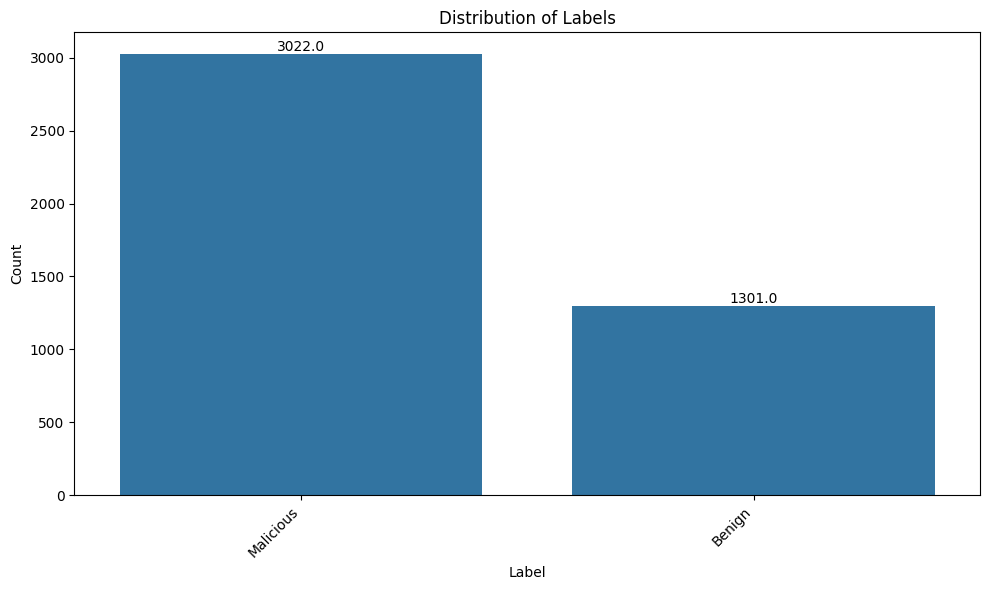

In [5]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Label', data=df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add count numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

In [6]:
# Initial data overview
counts = df.groupby(['Label', 'Traffic Type', 'Traffic Subtype']).size().reset_index(name='Counts')
print(counts)

        Label           Traffic Type        Traffic Subtype  Counts
0      Benign                  Audio                  Audio     190
1      Benign             Background             Background      32
2      Benign                   Text                   Text     209
3      Benign                  Video             Video HTTP     376
4      Benign                  Video              Video RTP     349
5      Benign                  Video              Video UDP     145
6   Malicious             Bruteforce         Bruteforce DNS     111
7   Malicious             Bruteforce         Bruteforce FTP       3
8   Malicious             Bruteforce        Bruteforce HTTP     628
9   Malicious             Bruteforce         Bruteforce SSH       2
10  Malicious             Bruteforce      Bruteforce Telnet       6
11  Malicious                    DoS                DoS ECN       6
12  Malicious                    DoS               DoS HTTP     400
13  Malicious                    DoS            

# Correlation matrix

    0.9 to 1 or -0.9 to -1 --> Perfect Correlation
    0.5 to 0.9 or -0.5 to -0.9 --> Strong
    0.1 to 0.5 or -0.1 to -0.5 --> Weak
    0.0 to 0.1 or 0.0 to -0.1 --> Uncorrelated



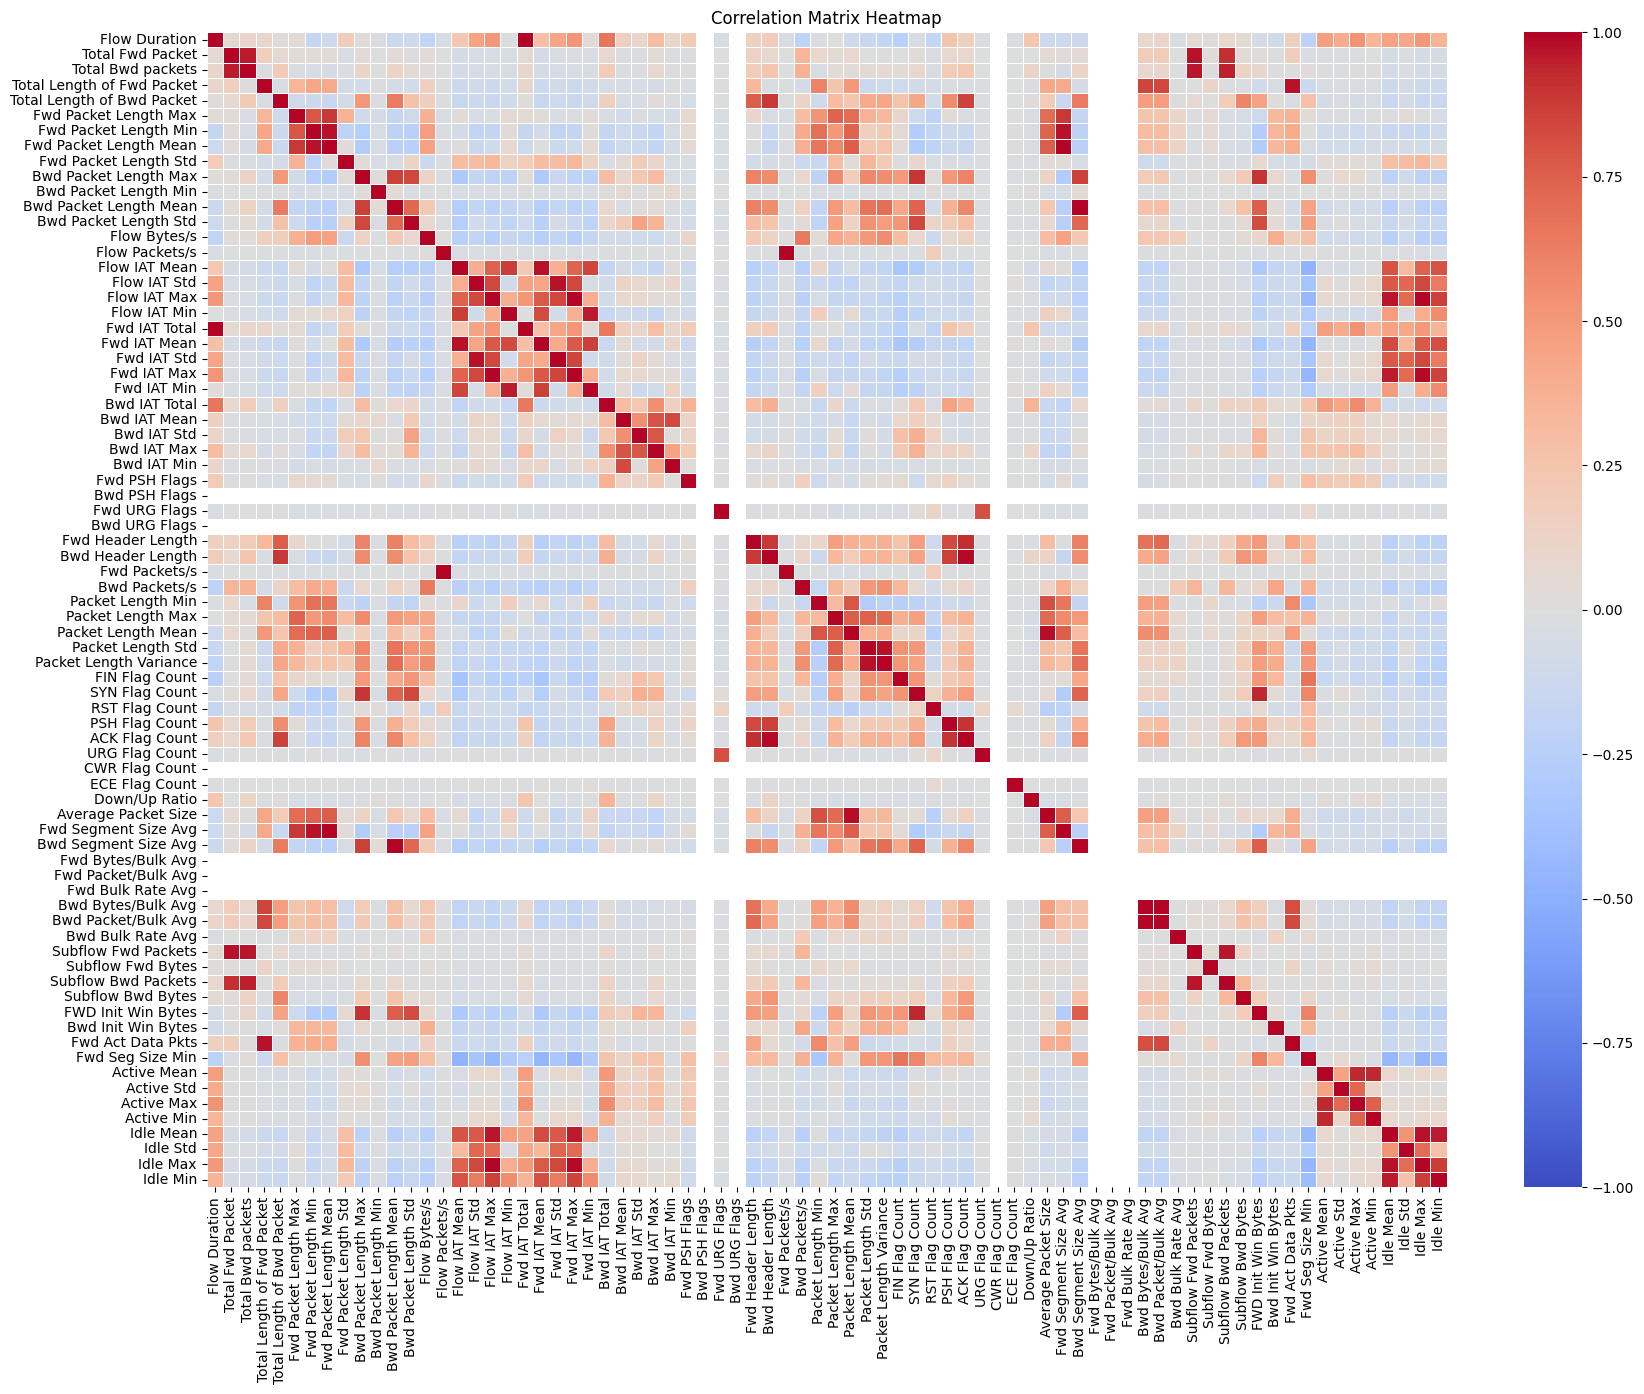

In [7]:
# Drop the unnecessary columns for correlation analysis
corr_df= df.drop(columns=['Flow ID', 'Src IP', 'Dst IP', 'Src Port', 'Dst Port', 'Protocol', 'Timestamp', 'Label', 'Traffic Type', 'Traffic Subtype'])

# Calculate the correlation matrix
corr_df = corr_df.corr()

# Plot correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(corr_df, annot=False, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Drop high-correlated (redundant) features
- Remove features with |corr| > 0.9
- The correlation matrix is symmetric (f1–f2 = f2–f1).
- We only need to check one triangle to avoid duplicates.
- Diagonal is always 1.0 (self-correlation), so we remove it too


In [8]:
corr_matrix = corr_df.abs()

# Create triangle matrix
upper = corr_df.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# upper i.e:
#        f1    f2    f3
# f1    NaN  0.95  0.20
# f2    NaN   NaN  0.30
# f3    NaN   NaN   NaN

to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]
df_reduced = df.drop(columns=to_drop)

print("Raw dataframe's shape: ", df.shape)
print("Dropped features:", to_drop)
print("Dataframe's shape after clean up redundant features: ", df_reduced.shape)

Raw dataframe's shape:  (4323, 86)
Dropped features: ['Total Bwd packets', 'Fwd Packet Length Mean', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Fwd Packets/s', 'Packet Length Variance', 'ACK Flag Count', 'Average Packet Size', 'Fwd Segment Size Avg', 'Bwd Segment Size Avg', 'Bwd Packet/Bulk Avg', 'Subflow Fwd Packets', 'Subflow Bwd Packets', 'FWD Init Win Bytes', 'Fwd Act Data Pkts', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Max', 'Idle Min']
Dataframe's shape after clean up redundant features:  (4323, 63)


# **Data Preparing**

### Drop Feature

1. Flow ID → just an identifier.
2. Src IP, Dst IP → Constraint: the model will just memorize attacker IPs seen in training (cheating, won’t generalize). Also IP add is 99% duplicated in this dataset.
3. Src Port, Dst Port → same issue: Some attacks use specific ports, but attackers can change them. It’s not reliable to use raw.
4. Timestamp → Useless for classification directly (We can engineer features like time-of-day patterns later).
5. Traffic Type, Traffic Subtype → Definitely leakage, since they directly map to Label.
6. Label → target, not a feature.
7. Drop unused columns  
8. Drop duplicate rows  
9. Set decimal round to 3  

In [9]:
TARGET_VARIABLE = 'Label'
DROP_COLUMNS = ['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Timestamp']
TARGET_TO_DROP = {'Label': ['Traffic Type', 'Traffic Subtype'],
                  'Traffic Type': ['Label', 'Traffic Subtype'],
                  'Traffic Subtype': ['Label', 'Traffic Type']}

# Drop 5-tuple collumns and timestamp
df = df_reduced.drop(columns=DROP_COLUMNS)

# Filter out duplicates within the same target
df = df.round(3)
df = df.drop_duplicates()
df = df.drop(columns=TARGET_TO_DROP[TARGET_VARIABLE])

print("Dropped features: ",DROP_COLUMNS + TARGET_TO_DROP[TARGET_VARIABLE])
print("Final dataset's shape: ", df.shape)
df.head()


Dropped features:  ['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Timestamp', 'Traffic Type', 'Traffic Subtype']
Final dataset's shape:  (4303, 55)


,Protocol,Flow Duration,Total Fwd Packet,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Bytes,Subflow Bwd Bytes,Bwd Init Win Bytes,Fwd Seg Size Min,Active Mean,Active Std,Idle Std,Label
0,6.0,16137238.0,42.0,106.0,354.0,12.0,0.0,3.814,39.0,0.0,9.833,10.71,28.505,4.834,2.095745e+05,7.738397e+05,3492384.0,24.0,16133049.0,460944.257,1113060.275,3495337.0,43.0,0.0,0.0,0.0,0.0,1352.0,1160.0,2.231,0.0,39.0,5.823,8.535,1.0,2.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,877.0,21.0,70.0,506.0,32.0,0.0,0.0,0.000000e+00,Malicious
1,6.0,18034225.0,2.0,80.0,0.0,50.0,30.0,14.142,0.0,0.0,0.000,0.00,4.436,0.166,9.017112e+06,1.272104e+07,18012247.0,21978.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,60.0,20.0,0.055,0.0,50.0,32.500,23.629,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,20.0,0.0,0.0,0.000000e+00,Malicious
2,6.0,40561.0,1.0,50.0,0.0,50.0,50.0,0.000,0.0,0.0,0.000,0.00,1232.711,49.308,4.056100e+04,0.000000e+00,40561.0,40561.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,24.654,0.0,50.0,33.333,28.868,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.000000e+00,Malicious
3,6.0,56068152.0,3.0,150.0,0.0,50.0,50.0,0.000,0.0,0.0,0.000,0.00,2.675,0.071,1.868938e+07,1.794382e+07,35828284.0,36572.0,0.0,0.000,0.000,0.0,0.0,1.0,0.0,0.0,0.0,60.0,20.0,0.018,0.0,50.0,40.000,22.361,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,20.0,0.0,0.0,1.104853e+07,Malicious
4,6.0,2992.0,2.0,6.0,0.0,6.0,0.0,4.243,0.0,0.0,0.000,0.00,2005.348,1002.674,1.496000e+03,2.076066e+03,2964.0,28.0,0.0,0.000,0.000,0.0,0.0,1.0,0.0,0.0,0.0,64.0,20.0,334.225,0.0,6.0,3.000,3.464,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,0.0,0.000000e+00,Malicious


### Process dataset
1. Split dataset
2. One hot encode string type data
3. Impute NaNs

In [10]:
from sklearn.calibration import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder


X = df.drop(TARGET_VARIABLE, axis=1)
y = df[TARGET_VARIABLE]

# Encode target
le = LabelEncoder()
y = le.fit_transform(y)

# Compute train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Identifying Numerical and Categorical columns
numerical_cols = X_train.select_dtypes(include=[np.number]).columns.to_list()
categorical_cols = X_train.select_dtypes(include=[object]).columns.to_list()

# Pipelines for Numerical and Categorical Data Transformations
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Column Transformer combining both pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Apply preprocessor to train and test data
preprocessor.fit(X_train)
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

## Random Forest for important features selection
- We'll use top 20 important features for binary classification (anomaly or not)

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf_selector = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf_selector.fit(X_train, y_train)

# Get top features
feature_names = X.columns
importance_df = pd.DataFrame({
    'feature_index': range(len(rf_selector.feature_importances_)),
    'feature_name': X.columns,  # Original feature names for reference
    'importance': rf_selector.feature_importances_
}).sort_values('importance', ascending=False)
print("Sorted features important:\n", importance_df)

# Select top 20 feature INDICES
top_feature_indices = importance_df.head(20)['feature_index'].tolist()
top_feature_names = importance_df.head(20)['feature_name'].tolist()
print("Top 20 features:\n",top_feature_names)
print(f"Original X_train shape: {X_train.shape}")

# Select features using indices (works with NumPy arrays)
X_train = X_train[:, top_feature_indices]
X_test = X_test[:, top_feature_indices]
print(f"Selected X_train shape: {X_train.shape}")

Sorted features important:
     feature_index                feature_name  importance
17             17                Flow IAT Min    0.085706
1               1               Flow Duration    0.079977
32             32          Packet Length Mean    0.060701
33             33           Packet Length Std    0.051280
3               3  Total Length of Fwd Packet    0.049606
5               5       Fwd Packet Length Max    0.043189
27             27           Fwd Header Length    0.042484
6               6       Fwd Packet Length Min    0.039446
31             31           Packet Length Max    0.036508
15             15                Flow IAT Std    0.035568
30             30           Packet Length Min    0.035424
14             14               Flow IAT Mean    0.030884
7               7       Fwd Packet Length Std    0.030715
47             47           Subflow Fwd Bytes    0.030579
16             16                Flow IAT Max    0.029781
2               2            Total Fwd Packe

**Apply SMOTE**  
  
**SMOTE (Synthetic Minority Over-sampling Technique)** is applied to datasets to address **class imbalance problems**.  This occurs when one class has significantly fewer instances than another.  SMOTE **creates synthetic samples** of the minority class by interpolating between existing minority class data points, **making the dataset more balanced**. This helps **improve the performance of machine learning models**.

In [12]:
from imblearn.over_sampling import SMOTE
# Step 2: For training other models, then apply SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print(f"Balanced X_train shape: {X_train.shape}")
print(f"Balanced y_train shape: {y_train.shape}")

Balanced X_train shape: (4822, 20)
Balanced y_train shape: (4822,)


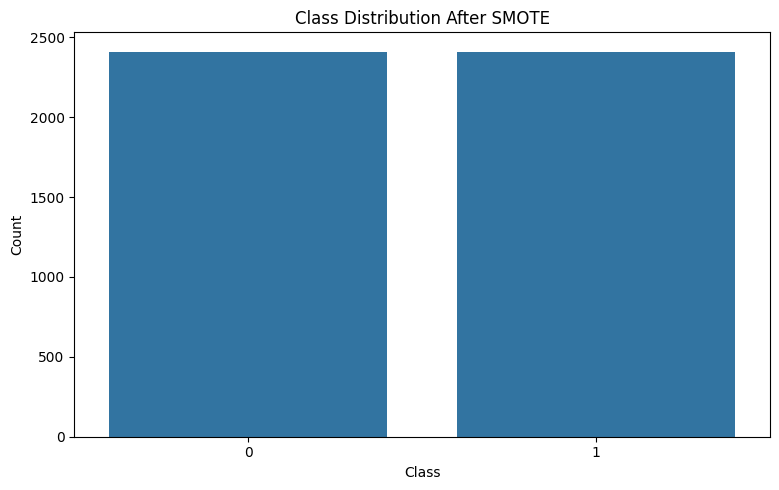

In [13]:
# Class distribution after SMOTE
unique_classes, counts_after = np.unique(y_train, return_counts=True)

# Plotting
plt.figure(figsize=(15, 5))

# After SMOTE
plt.subplot(1, 2, 1)
sns.barplot(x=unique_classes, y=counts_after, legend=False)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [14]:
import os
import pickle
import numpy as np

folder="output"
os.makedirs(folder, exist_ok=True)

# Save all arrays in compressed format
np.savez_compressed(f'{folder}/processed_data.npz',
                   X_train=X_train, X_test=X_test, 
                   y_train=y_train, y_test=y_test)

# Save feature names and other metadata
with open(f'{folder}/feature_metadata.pkl', 'wb') as f:
    pickle.dump({
        'selected_feature_names': top_feature_names,
        'label_encoder': le,
        'feature_indices': top_feature_indices
    }, f)

print("Data preprocessing complete! Ready for model training.")

Data preprocessing complete! Ready for model training.
